# 1.1 - Working with Unlabeled Data – Clustering Analysis

### 内容

- [用K-means按相似度为样本分组](#Grouping-objects-by-similarity-using-k-means)
  - [K-means++](#K-means++)
  - [硬聚类与软聚类](#Hard-versus-soft-clustering)
  - [用弯形判据（肘部法则）来发现最适合的聚类数](#Using-the-elbow-method-to-find-the-optimal-number-of-clusters)
  - [通过轮廓图来量化聚类的质量](#Quantifying-the-quality-of-clustering-via-silhouette-plots)
- [将聚类结果组织为层次树](#Organizing-clusters-as-a-hierarchical-tree)
  - [在距离矩阵上执行分层聚类](#Performing-hierarchical-clustering-on-a-distance-matrix)
  - [附加树状图到热图上](#Attaching-dendrograms-to-a-heat-map)
  - [通过scikit-learn应用凝聚聚类](#Applying-agglomerative-clustering-via-scikit-learn)
- [通过DBSCAN定位高密度区域](#Locating-regions-of-high-density-via-DBSCAN)
- [总结](#Summary)

In [1]:
from IPython.display import Image
import matplotlib
%matplotlib inline
zhfont1 = matplotlib.font_manager.FontProperties(fname='C:\Windows\Fonts\simkai.ttf')

##  用K-means按相似度为样本分组
## Grouping objects by similarity using k-means

In [2]:
#构造150个2个特征3类的样本数据
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

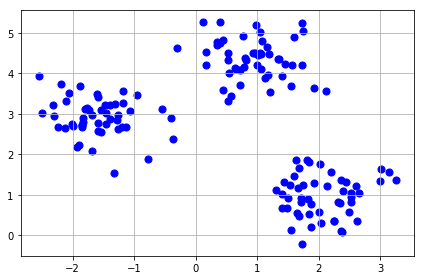

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', s=50)  #绘制散点图，s是marker的大小
plt.grid()
plt.tight_layout()
#plt.savefig('./figures/spheres.png', dpi=300)
plt.show()

In [4]:
#dir(plt.cm)
#??matplotlib.markers

In [5]:
#用KMean聚类
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,    #聚成3类
            init='random',   #初始中心随机选择
            n_init=10,       #获取初始簇中心的更迭次数，算法默认会初始10个质心，实现算法，然后返回最好的结果。
            max_iter=300,    #执行一次k-means算法所进行的最大迭代数
            tol=1e-04,       #容忍度，即kmeans运行准则收敛的条件，容忍的最小误差，当误差小于tol就会退出迭代
            random_state=0)  #随机生成簇中心的状态条件， 随机生成器的种子 ，和初始化中心有关
y_km = km.fit_predict(X)     #训练模型并预测

In [6]:
#查看聚类结果，150个样本被聚为3类：0，1，2
y_km

array([1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1,
       0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1,
       1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0,
       2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1], dtype=int32)

In [7]:
#构造聚类结果为0类的第1个特征（第0列）数据参数
y_km==0, 0    #用此来构造X轴数据

(array([False,  True,  True,  True, False,  True,  True, False, False,
         True, False, False, False,  True,  True, False, False, False,
        False, False,  True, False,  True,  True, False, False, False,
         True, False, False, False, False, False, False,  True, False,
        False, False,  True,  True, False, False,  True, False, False,
        False, False,  True, False,  True, False,  True,  True, False,
        False, False,  True, False, False,  True, False, False, False,
        False,  True, False,  True, False,  True,  True,  True, False,
        False,  True, False,  True,  True, False, False,  True, False,
        False,  True,  True, False, False, False, False, False, False,
        False,  True, False,  True, False,  True, False, False, False,
        False, False, False, False, False, False,  True, False,  True,
         True,  True, False,  True, False, False,  True, False,  True,
         True, False, False,  True, False,  True,  True, False, False,
      

In [8]:
#查看前10个样本
X[0:10]

array([[ 2.60509732,  1.22529553],
       [ 0.5323772 ,  3.31338909],
       [ 0.802314  ,  4.38196181],
       [ 0.5285368 ,  4.49723858],
       [ 2.61858548,  0.35769791],
       [ 1.59141542,  4.90497725],
       [ 1.74265969,  5.03846671],
       [ 2.37533328,  0.08918564],
       [-2.12133364,  2.66447408],
       [ 1.72039618,  5.25173192]])

In [13]:
#理解选择第1到4个样本，第0列，理解上面  y_km==0, 0的含义
X[1:5,0]

array([0.5323772 , 0.802314  , 0.5285368 , 2.61858548])

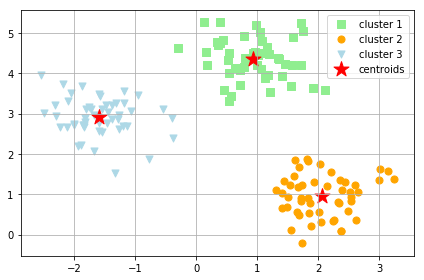

In [9]:
plt.scatter(X[y_km == 0, 0],  #x轴数据，通过上面分析过程来理解   
            X[y_km == 0, 1],  #y轴数据，通过上面分析过程来理解
            s=50,             #s为marker的大小
            c='lightgreen',
            marker='s',
            label='cluster 1')  #设置标签
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50,
            c='lightblue',
            marker='v',
            label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0], #绘制聚类中心
            km.cluster_centers_[:, 1],
            s=250,
            marker='*',
            c='red',
            label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig('./figures/centroids.png', dpi=300)
plt.show()

### K-means++

k-means算法缺点:1、需要提前指定k，2、k-means算法对初始化非常敏感

k-means++主要用来解决第二个缺点，k-means++算法选择初始聚类中心的基本原则是：初始的聚类中心之间的相互距离要尽可能的远。

### 硬聚类和软聚类（Hard versus soft clustering）

聚类分析如果按照隶属度的取值范围可以分为两类，一类叫硬聚类算法，另一类就是模糊聚类算法（软聚类）。隶属度的概念是从模糊集理论里引申出来的。传统硬聚类算法隶属度只有两个值 0 和 1。 也就是说一个样本只能完全属于某一个类或者完全不属于某一个类。而模糊集里的隶属度是一个取值在[0 1]区间内的数。一个样本同时属于所有的类，但是通过隶属度的大小来区分其差异。

### 用弯形判据（肘部法则）来发现最适合的聚类数
### Using the elbow method to find the optimal number of clusters 

In [15]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


inertia可以被认为是类内聚合度的一种度量方式，这种度量方式的主要缺点是：

（1）​inertia假设数据内的聚类都是凸的并且各向同性（ convex and isotropic），各项同性是指在数据的属性在不同方向上是相同的。数据并不是总能够满足这些前提假设的，所以当数据是细长簇的聚类，或者不规则形状的流形时，K-means算法的效果不理想。

（2）inertia不是一种归一化度量方式。一般来说，inertia值越小，说明聚类效果越好。但是在高维空间中，欧式距离的值可能会呈现迅速增长的趋势，所以在进行K-means之前首先进行降维操作，如PCA等，可以解决高维空间中inertia快速增长的问题，也有主意提高计算速度。

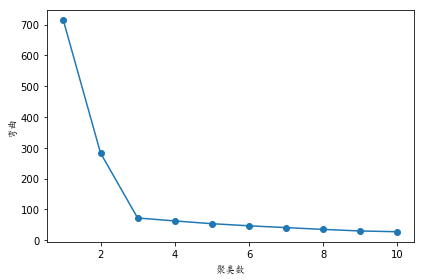

In [16]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('聚类数',fontproperties=zhfont1)
plt.ylabel('弯曲',fontproperties=zhfont1)
plt.tight_layout()
#plt.savefig('./figures/elbow.png', dpi=300)
plt.show()

### 通过轮廓图来量化聚类的质量
### Quantifying the quality of clustering  via silhouette plots

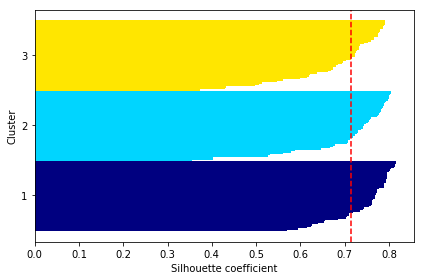

In [17]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

本例中，聚成3类的轮廓系数大于0.7，越接近于1越好。(图从左向右看)

轮廓系数（Silhouette Coefficient），是聚类效果好坏的一种评价方式。

方法：

1，计算样本i到同簇其他样本的平均距离ai。ai 越小，说明样本i越应该被聚类到该簇。将ai 称为样本i的簇内不相似度。簇C中所有样本的a i 均值称为簇C的簇不相似度。

2，计算样本i到其他某簇Cj 的所有样本的平均距离bij，称为样本i与簇Cj 的不相似度。定义为样本i的簇间不相似度：bi =min{bi1, bi2, ..., bik}，bi越大，说明样本i越不属于其他簇。

3，根据样本i的簇内不相似度ai 和簇间不相似度bi 

4，判断：<br>
   si接近1，则说明样本i聚类合理；<br>
   si接近-1，则说明样本i更应该分类到另外的簇；<br>
   若si 近似为0，则说明样本i在两个簇的边界上。<br>
   
#### 所有样本的si 的均值称为聚类结果的轮廓系数，是该聚类是否合理、有效的度量。

<font color='red'>与不好的聚类比较:</font>

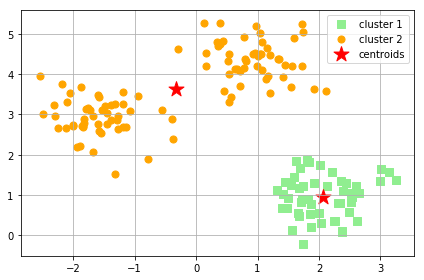

In [18]:
km = KMeans(n_clusters=2,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*', c='red', label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig('./figures/centroids_bad.png', dpi=300)
plt.show()

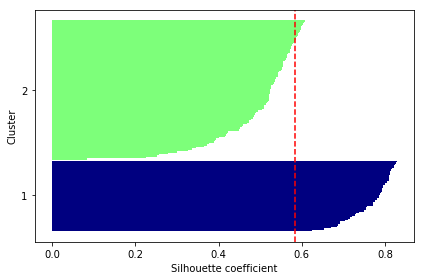

In [19]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
# plt.savefig('./figures/silhouette_bad.png', dpi=300)
plt.show()

聚成2类的轮廓系数小于0.6，没有聚成3类的效果好。

## 将聚类结果组织为层次树
## Organizing clusters as a hierarchical tree

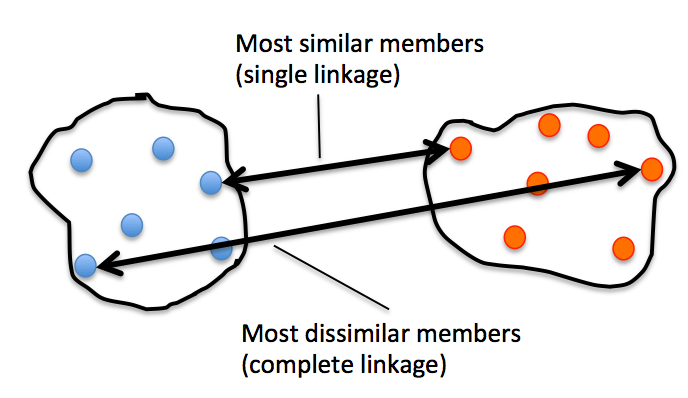

In [20]:
Image(filename='./images/11_05.png', width=400) #层次聚类中的单链和全链

In [21]:
import pandas as pd
import numpy as np

np.random.seed(123)

variables = ['X', 'Y', 'Z']                              #数据框中3列
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']        #行索引

X = np.random.random_sample([5, 3])*10                   #构造5行3列随机数，并乘以10
df = pd.DataFrame(X, columns=variables, index=labels)    #构造数据框
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


### 在距离矩阵上执行层次聚类
### Performing hierarchical clustering on a distance matrix

In [22]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')), #求行与行之间距离，用欧氏距离公式，并专成平方
                        columns=labels,
                        index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


我们可以从`pdist`函数传递一个压缩距离矩阵（上三角），或者我们可以传递“原始”数据数组，并在`linkage`中定义`metric ='euclidean'`参数。 但是，我们不应该通过平方距离矩阵，虽然总体聚类可能是相同的，但是会产生不同的距离值。

In [23]:
# 1. 不正确的做法：平方距离矩阵

from scipy.cluster.hierarchy import linkage

row_clusters = linkage(row_dist, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,6.521973,2.0
cluster 2,1.0,2.0,6.729603,2.0
cluster 3,3.0,5.0,8.539247,3.0
cluster 4,6.0,7.0,12.444824,5.0


In [24]:
# 2. 正确的方法：压缩距离矩阵
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


In [25]:
# 3. 正确的做法：输入样本矩阵

row_clusters = linkage(df.values, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


绘制树状图

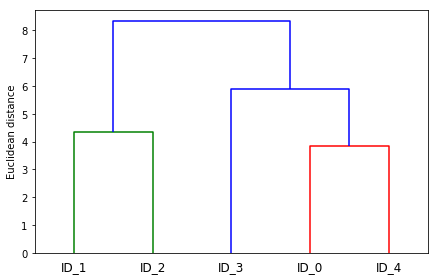

In [26]:
from scipy.cluster.hierarchy import dendrogram #树状图

# make dendrogram black (part 1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])

row_dendr = dendrogram(row_clusters, 
                       labels=labels,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
#plt.savefig('./figures/dendrogram.png', dpi=300, 
#            bbox_inches='tight')
plt.show()

<br>

### 附加树状图到热图上
### Attaching dendrograms to a heat map

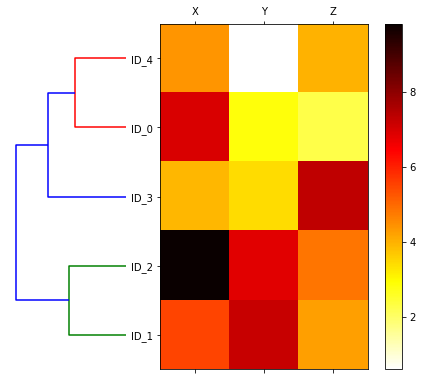

In [25]:
from scipy.cluster.hierarchy import dendrogram #树状图
# plot row dendrogram
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])

# note: for matplotlib < v1.5.1, please use orientation='right'
row_dendr = dendrogram(row_clusters, orientation='left')

# reorder data with respect to clustering
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axd.set_xticks([])
axd.set_yticks([])

# remove axes spines from dendrogram
for i in axd.spines.values():
        i.set_visible(False)

# plot heatmap
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])  # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

# plt.savefig('./figures/heatmap.png', dpi=300)
plt.show()

### 通过scikit-learn应用凝聚聚类
### Applying agglomerative clustering via scikit-learn

In [27]:
from sklearn.cluster import AgglomerativeClustering  #凝聚聚类,层次聚类的两种方法之一

ac = AgglomerativeClustering(n_clusters=2, 
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)  #输出5个样本分别属于两类的那一类

Cluster labels: [0 1 1 0 0]


## 通过DBSCAN定位高密度区域
## Locating regions of high density via DBSCAN

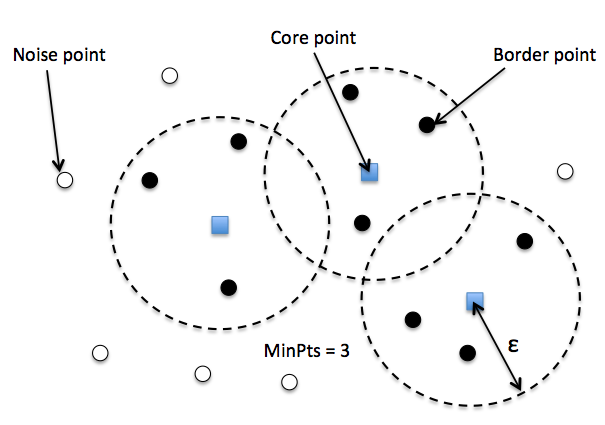

In [28]:
Image(filename='./images/11_11.png', width=500) #密度聚类，核心点、边界点、噪声点、半径、最小样本点

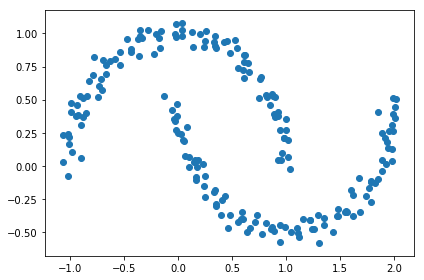

In [29]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
# plt.savefig('./figures/moons.png', dpi=300)
plt.show()

先用K-means和hierarchical进行聚类:

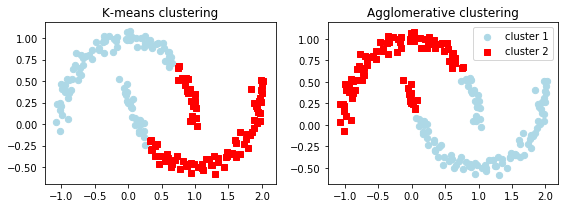

In [30]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2, random_state=0)       #用KMeans聚成两类
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2,     #用凝聚的层次聚类方法
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
#plt.savefig('./figures/kmeans_and_ac.png', dpi=300)
plt.show()

使用密度距离（Density-based clustering）:

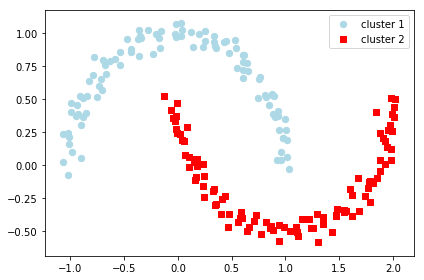

In [31]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean') #参数是半径、最小样本点、距离公式
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            label='cluster 2')
plt.legend()
plt.tight_layout()
#plt.savefig('./figures/moons_dbscan.png', dpi=300)
plt.show()

<br>
<br>

## 总结

...